# Import Libraries

In [1]:
import librosa
import librosa.feature 
import librosa.display
import glob 
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Activation 
from keras.utils.np_utils import to_categorical

In [2]:
! pip install -q kaggle

# Access Kaggle API

Upload kaggle api key

In [3]:
from google.colab import files

files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"aazmhafidzazis","key":"a84beb0a25117ab6ad3b7582ba6648b6"}'}

# Dataset Preparation

Download and unzipping dataset

In [4]:
!pip install --upgrade kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


Requirement already up-to-date: kaggle in /usr/local/lib/python3.6/dist-packages (1.5.10)


In [5]:
!kaggle datasets list

ref                                                       title                                         size  lastUpdated          downloadCount  
--------------------------------------------------------  -------------------------------------------  -----  -------------------  -------------  
gpreda/reddit-wallstreetsbets-posts                       Reddit WallStreetBets Posts                    8MB  2021-02-21 10:42:58           1485  
michau96/restaurant-business-rankings-2020                Restaurant Business Rankings 2020             16KB  2021-01-30 14:20:45           2483  
yorkehead/stock-market-subreddits                         Stock Market Subreddits                        1MB  2021-01-29 13:53:50            268  
aagghh/crypto-telegram-groups                             Crypto telegram groups                       297MB  2021-02-02 09:58:25            170  
timoboz/superbowl-history-1967-2020                       Superbowl History 1967 - 2020                  2KB  2020-02-

In [15]:
! kaggle datasets download -d aazmhafidzazis/kasrahhijaiyahaudio
! mkdir dataset_final
! unzip /content/kasrahhijaiyahaudio.zip -d dataset_final



 98% 250M/254M [00:03<00:00, 78.1MB/s]
100% 254M/254M [00:03<00:00, 81.5MB/s]
Archive:  /content/kasrahhijaiyahaudio.zip
  inflating: dataset_final/Dataset - Filter -  Fix/.png  
  inflating: dataset_final/Dataset - Filter -  Fix/1. I/Ponpes At Taufiq F.1-01.wav  
  inflating: dataset_final/Dataset - Filter -  Fix/1. I/Ponpes At Taufiq F.1-02.wav  
  inflating: dataset_final/Dataset - Filter -  Fix/1. I/Ponpes At Taufiq F.1-03.wav  
  inflating: dataset_final/Dataset - Filter -  Fix/1. I/Ponpes At Taufiq F.1-04.wav  
  inflating: dataset_final/Dataset - Filter -  Fix/1. I/Ponpes At Taufiq F.1-05.wav  
  inflating: dataset_final/Dataset - Filter -  Fix/1. I/Ponpes At Taufiq F.1-06.wav  
  inflating: dataset_final/Dataset - Filter -  Fix/1. I/Ponpes At Taufiq F.1-07.wav  
  inflating: dataset_final/Dataset - Filter -  Fix/1. I/Ponpes At Taufiq F.1-08.wav  
  inflating: dataset_final/Dataset - Filter -  Fix/1. I/Ponpes At Taufiq F.1-09.wav  
  inflating: dataset_final/Dataset - Filter -  

Dataset location directory

In [28]:
# DATA_DIR = 'archive/Data/'
# genres_path = DATA_DIR + 'genres_original/'
genres_path = '/content/dataset_final_fix/Dataset - Filter/'
# images_path = DATA_DIR + 'images_original/'

In [29]:
print(genres_path)

/content/dataset_final_fix/Dataset - Filter/


MFCC

In [30]:
def display_mfcc(song):
   y, _ = librosa.load(song)
   mfcc = librosa.feature.mfcc(y)

   plt.figure(figsize=(10, 4))
   librosa.display.specshow(mfcc, x_axis='time', y_axis='mel')
   plt.colorbar()
   plt.title(song)
   plt.tight_layout()
   plt.show()

In [31]:
def extract_features_song(song):
    y, _ = librosa.load(song)

    # get Mel-frequency cepstral coefficients
    mfcc = librosa.feature.mfcc(y)
    # normalize values between -1,1 (divide by max)
    mfcc /= np.amax(np.absolute(mfcc))

    return np.ndarray.flatten(mfcc)[:800]

In [32]:
def generate_features_and_labels():
    '''
    Produce MFCC values and genre names 
    from all the songs in the dataset
    '''
    
    # Prepare a list for all the features and all the labels
    all_features = []
    all_labels = []

    genres = ['1. I', '2. Bi', '3. Ti', '4. Tsi', '5. Ji' ,
              '6. hi', '7. Khi', '8. Di', '9. Dzi', '10. Ri' ,
              '11. Dzi', '12. Si','13. Syi','14. Shi','15. Dhi',
              '16. Thi','17. Dzhi',"18. 'i",'19. Ghi','20. fi',
              '21. Qi','22. ki','23. li','24. mi','25. ni','26. wi','27. Hi','28. Yi' ]
#    
    print('Total genres ', len(genres))

    # Extract features and genre names from each song
    for genre in genres:
        sound_files = glob.glob(genres_path + genre + '/*.wav')
        print('Processing %d songs in %s genre...' % (len(sound_files), genre))
        for f in sound_files :
                features = extract_features_song(f)
                all_features.append(features)
                all_labels.append(genre)
            
    label_uniq_ids, label_row_ids = np.unique(all_labels, return_inverse= True)
    label_row_ids = label_row_ids.astype(np.int32, copy=False)
    onehot_labels = to_categorical(label_row_ids,  len(label_uniq_ids))
    
    return np.stack(all_features), onehot_labels

Generate features and labels using MFCC

In [33]:
features, labels = generate_features_and_labels()

Total genres  28
Processing 228 songs in 1. I genre...
Processing 226 songs in 2. Bi genre...
Processing 206 songs in 3. Ti genre...
Processing 188 songs in 4. Tsi genre...
Processing 214 songs in 5. Ji genre...
Processing 218 songs in 6. hi genre...
Processing 218 songs in 7. Khi genre...
Processing 212 songs in 8. Di genre...
Processing 212 songs in 9. Dzi genre...
Processing 216 songs in 10. Ri genre...
Processing 202 songs in 11. Dzi genre...
Processing 216 songs in 12. Si genre...
Processing 224 songs in 13. Syi genre...
Processing 196 songs in 14. Shi genre...
Processing 214 songs in 15. Dhi genre...
Processing 218 songs in 17. Dzhi genre...
Processing 218 songs in 18. 'i genre...
Processing 212 songs in 19. Ghi genre...
Processing 218 songs in 20. fi genre...
Processing 218 songs in 21. Qi genre...
Processing 218 songs in 22. ki genre...
Processing 220 songs in 23. li genre...
Processing 220 songs in 24. mi genre...
Processing 222 songs in 25. ni genre...
Processing 218 songs in

Display result of dataset preparation

In [34]:
print(np.shape(features))
print(np.shape(labels))

(6032, 800)
(6032, 28)


In [35]:
x = features
y = labels

print(x, y)

[[-1.0000000e+00 -1.0000000e+00 -1.0000000e+00 ... -1.1435316e-03
  -4.7612601e-04 -1.5529309e-04]
 [-9.9871117e-01 -9.9950290e-01 -9.9946225e-01 ... -6.7795202e-04
  -4.2627245e-05 -1.3866351e-02]
 [-1.0000000e+00 -1.0000000e+00 -1.0000000e+00 ...  0.0000000e+00
   0.0000000e+00  0.0000000e+00]
 ...
 [-9.9945593e-01 -9.9948394e-01 -9.9954855e-01 ... -1.2028816e-04
  -2.1687175e-04  8.7351457e-04]
 [-1.0000000e+00 -1.0000000e+00 -1.0000000e+00 ...  0.0000000e+00
   0.0000000e+00  0.0000000e+00]
 [-1.0000000e+00 -1.0000000e+00 -1.0000000e+00 ...  0.0000000e+00
   0.0000000e+00  0.0000000e+00]] [[1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


Dataset preprocessing

In [36]:
from sklearn import preprocessing

min_max_scaler = preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(x)
X_scale

array([[0.        , 0.        , 0.        , ..., 0.65187734, 0.60649025,
        0.611659  ],
       [0.00264573, 0.0010097 , 0.00111771, ..., 0.65646225, 0.6111578 ,
        0.46870148],
       [0.        , 0.        , 0.        , ..., 0.66313857, 0.61161673,
        0.61327815],
       ...,
       [0.00111699, 0.00104809, 0.00093842, ..., 0.661954  , 0.60928166,
        0.6223858 ],
       [0.        , 0.        , 0.        , ..., 0.66313857, 0.61161673,
        0.61327815],
       [0.        , 0.        , 0.        , ..., 0.66313857, 0.61161673,
        0.61327815]], dtype=float32)

Splitting data training and testing

In [37]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X_scale, y, test_size = 0.2)

print(np.shape(X_train))
print(np.shape(X_test))
print(np.shape(Y_train))
print(np.shape(Y_test))

(4825, 800)
(1207, 800)
(4825, 28)
(1207, 28)


In [38]:
import tensorflow as tf

X_train = tf.expand_dims(X_train, axis=-1)
X_test = tf.expand_dims(X_test, axis=-1)

print(np.shape(X_train))
print(np.shape(X_test))

(4825, 800, 1)
(1207, 800, 1)


# Making CNN Model

Setting model parameter

In [39]:
def trainModel(model, epochs, optimizer):
    batch_size = 32
    model.compile(optimizer=optimizer,
                  loss='categorical_crossentropy',
                  metrics='accuracy'
    )
    return model.fit(X_train, Y_train, validation_data = (X_test, Y_test), epochs=epochs, 
                     batch_size=batch_size)

In [54]:
model = tf.keras.models.Sequential([
      tf.keras.layers.Conv1D(filters=512, kernel_size=3, activation='relu', input_shape=(800,1)),
      tf.keras.layers.MaxPooling1D(pool_size=2),
      tf.keras.layers.Dropout(0.2),
      tf.keras.layers.Conv1D(filters=256, kernel_size=3, activation='relu',),
      tf.keras.layers.MaxPooling1D(pool_size=2),
      tf.keras.layers.Dropout(0.2),
      tf.keras.layers.Conv1D(filters=128, kernel_size=3, activation='relu',),
      tf.keras.layers.MaxPooling1D(pool_size=2),
      tf.keras.layers.Dropout(0.2),
      tf.keras.layers.Flatten(),
      tf.keras.layers.Dense(100, activation='relu'),
      tf.keras.layers.Dropout(0.4),
      tf.keras.layers.Dense(28, activation='softmax'),                              
])

model.summary()
model_3_history = trainModel(model=model, epochs=100, optimizer='rmsprop')

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_24 (Conv1D)           (None, 798, 512)          2048      
_________________________________________________________________
max_pooling1d_24 (MaxPooling (None, 399, 512)          0         
_________________________________________________________________
dropout_23 (Dropout)         (None, 399, 512)          0         
_________________________________________________________________
conv1d_25 (Conv1D)           (None, 397, 256)          393472    
_________________________________________________________________
max_pooling1d_25 (MaxPooling (None, 198, 256)          0         
_________________________________________________________________
dropout_24 (Dropout)         (None, 198, 256)          0         
_________________________________________________________________
conv1d_26 (Conv1D)           (None, 196, 128)         

Model training

Model result

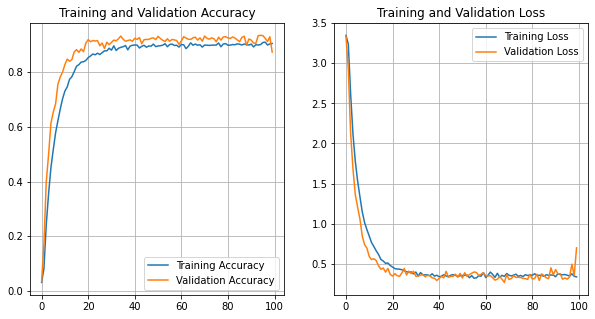

In [55]:
import matplotlib.pyplot as plt
def plot_hist(history):
    acc = model_3_history.history['accuracy']
    val_acc = model_3_history.history['val_accuracy']

    loss = model_3_history.history['loss']
    val_loss = model_3_history.history['val_loss']

    plt.figure(figsize=(10, 5))
    
    plt.subplot(1, 2, 1)
    plt.plot(acc, label='Training Accuracy')
    plt.plot(val_acc, label='Validation Accuracy')
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')
    plt.grid()

    plt.subplot(1, 2, 2)
    plt.plot(loss, label='Training Loss')
    plt.plot(val_loss, label='Validation Loss')
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')
    plt.grid()
    plt.show()

plot_hist(model_3_history)


In [57]:
 model.evaluate(
    X_test,
    Y_test,
    batch_size = 32
)

38/38 [==============================] - 0s 9ms/step - loss: 0.6999 - accuracy: 0.8732


[0.6998554468154907, 0.8732394576072693]

# Serialize and save training model




[References](https://machinelearningmastery.com/save-load-keras-deep-learning-models/)

Save model to json

In [58]:
# serialize model to JSON
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model.h5")
print("Saved model to disk")

Saved model to disk


# Load Saved Model (Optional)


If you have existing model to use, in order to use it please follow these steps :
1.   Upload those model files (.json and .h5 file) to colab storage
2.   Left click on **This** cell
3.   Select *Runtime > Run After* at the topbar (or *CTRL + F10*)
4.   Done

But if you dont want to use existing model, just ignore this message

Load model from file

In [59]:
# load json and create model
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = tf.keras.models.model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("model.h5")
print("Loaded model from disk")

Loaded model from disk


Test loaded model

In [60]:
loaded_model.compile(
    optimizer='adam', 
    loss='categorical_crossentropy', 
    metrics=['accuracy']
)

In [61]:
loaded_model.evaluate(
    X_test,
    Y_test,
    batch_size = 32
)

38/38 [==============================] - 1s 10ms/step - loss: 0.6839 - accuracy: 0.8783


[0.6998554468154907, 0.8732394576072693]

# Testing and Prediction

Function helper

In [62]:
def get_prediction_label(prediction_result):
  genres = ['I', 'Bi', 'Ti', 'Tsi', 'Ji' ,
          'hi', 'Khi', 'Di', 'Dzi', 'Ri' ,
          'Dzi', 'Si','Syi','Shi','Dhi',
          'Thi','Dzhi',"'i",'Ghi','fi',
          'Qi','ki','li','mi','ni','wi','Hi','Yi' ]
  prediction_result = list(zip(prediction_result[0], genres))
  print(prediction_result)

  return get_highest_pair(prediction_result)

In [63]:
def get_highest_pair(arr):
    if not arr:
        raise ValueError('empty sequence')

    maximum = arr[0]

    for item in arr:
        # Compare elements by their weight stored
        # in their second element.
        if item[0] > maximum[0]:
            maximum = item

    return maximum

In [64]:
def print_formatted_prediction(prediction_label):
  percentage = round(prediction_label[0] * 100, 2)
  print("Hasil prediksi adalah '{}' dengan akurasi sebesar {:.2f}%".format(prediction_label[1], percentage ))

#### Using file from test dataset

Display test data value

In [65]:
X_test[:1]

<tf.Tensor: shape=(1, 800, 1), dtype=float32, numpy=
array([[[1.05559826e-02],
        [7.58790970e-03],
        [4.05434728e-01],
        [7.28216887e-01],
        [7.10816979e-01],
        [1.28815413e-01],
        [2.77471542e-03],
        [5.10227680e-03],
        [2.45332718e-03],
        [1.06537342e-03],
        [0.00000000e+00],
        [9.52482224e-05],
        [2.99084187e-03],
        [6.82318211e-03],
        [7.52544403e-03],
        [3.36205959e-03],
        [5.10084629e-03],
        [9.09388065e-03],
        [5.54335117e-03],
        [7.52866268e-03],
        [6.21759892e-03],
        [5.33813238e-02],
        [1.33217454e-01],
        [4.80914474e-01],
        [6.94131911e-01],
        [7.21690416e-01],
        [6.32808983e-01],
        [5.89604974e-01],
        [5.68839908e-01],
        [6.68603122e-01],
        [6.24347448e-01],
        [4.30950761e-01],
        [2.05746293e-01],
        [1.20750785e-01],
        [5.77039719e-02],
        [7.77471066e-03],
        [1.

Data prediction

In [66]:
data_test = X_test[:1]
print(np.shape(data_test))

(1, 800, 1)


In [67]:
prediction = model.predict(data_test)
prediction

array([[5.41648790e-02, 1.95361562e-02, 1.56056387e-02, 1.10927632e-03,
        3.19950574e-04, 6.29300531e-03, 5.13945613e-03, 2.54740776e-03,
        8.09899792e-02, 1.86738949e-02, 1.68056171e-02, 3.08429569e-01,
        7.44688790e-04, 2.22348445e-03, 4.30563372e-03, 2.27915235e-02,
        7.61822313e-02, 8.47891942e-02, 1.22398041e-01, 1.36592221e-02,
        1.24598481e-02, 2.86171045e-02, 1.57770012e-02, 3.14519368e-03,
        2.63101491e-03, 1.21129655e-04, 6.59907088e-02, 1.45491343e-02]],
      dtype=float32)

In [68]:
prediction_label = get_prediction_label(prediction)

[(0.05416488, 'I'), (0.019536156, 'Bi'), (0.015605639, 'Ti'), (0.0011092763, 'Tsi'), (0.00031995057, 'Ji'), (0.0062930053, 'hi'), (0.005139456, 'Khi'), (0.0025474078, 'Di'), (0.08098998, 'Dzi'), (0.018673895, 'Ri'), (0.016805617, 'Dzi'), (0.30842957, 'Si'), (0.0007446888, 'Syi'), (0.0022234845, 'Shi'), (0.0043056337, 'Dhi'), (0.022791523, 'Thi'), (0.07618223, 'Dzhi'), (0.084789194, "'i"), (0.12239804, 'Ghi'), (0.013659222, 'fi'), (0.012459848, 'Qi'), (0.028617105, 'ki'), (0.015777001, 'li'), (0.0031451937, 'mi'), (0.002631015, 'ni'), (0.000121129655, 'wi'), (0.06599071, 'Hi'), (0.014549134, 'Yi')]


In [69]:
print_formatted_prediction(prediction_label)

Hasil prediksi adalah 'Si' dengan akurasi sebesar 30.84%


### Using file from manual upload

In [70]:
uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(name=fn, length=len(uploaded[fn])))

Saving Ponpes At Taufiq M.2-284.wav to Ponpes At Taufiq M.2-284.wav
User uploaded file "Ponpes At Taufiq M.2-284.wav" with length 178710 bytes


In [71]:
for fn in uploaded.keys():
  file_feature = extract_features_song(fn)
file_feature

array([-1.00000000e+00, -1.00000000e+00, -1.00000000e+00, -1.00000000e+00,
       -1.00000000e+00, -1.00000000e+00, -1.00000000e+00, -1.00000000e+00,
       -1.00000000e+00, -1.00000000e+00, -1.00000000e+00, -1.00000000e+00,
       -9.47889686e-01, -9.27158594e-01, -8.71341646e-01, -7.74062574e-01,
       -7.17060983e-01, -6.98481441e-01, -6.95679843e-01, -6.90977275e-01,
       -6.74854934e-01, -6.18719161e-01, -5.73134363e-01, -5.50602973e-01,
       -5.37777364e-01, -5.25266886e-01, -5.38411140e-01, -5.94841480e-01,
       -6.48718894e-01, -6.76288128e-01, -7.61017442e-01, -7.84241796e-01,
       -8.39325249e-01, -9.66895103e-01, -9.88431513e-01, -9.92270112e-01,
       -9.98951912e-01, -9.99863863e-01, -1.00000000e+00, -1.00000000e+00,
       -9.98378277e-01, -9.92565811e-01, -9.96029973e-01, -9.99916136e-01,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  

In [72]:
processed_features = []
processed_features.append(np.stack(file_feature))
processed_features = tf.expand_dims(processed_features, axis=-1)
print(np.shape(processed_features))

(1, 800, 1)


In [73]:
file_prediction = model.predict(processed_features)
file_prediction

array([[0.0000000e+00, 0.0000000e+00, 1.0210835e-28, 9.7079200e-38,
        0.0000000e+00, 1.2213263e-36, 2.1110091e-23, 4.1328146e-35,
        2.2718806e-28, 0.0000000e+00, 1.0777062e-05, 3.6048563e-20,
        3.2958830e-36, 1.7775821e-21, 4.4772154e-15, 2.3148062e-22,
        9.7808800e-32, 0.0000000e+00, 8.6726443e-27, 9.4442883e-18,
        6.7697001e-16, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 9.9998927e-01, 4.4950505e-36]],
      dtype=float32)

In [74]:
file_prediction_label = get_prediction_label(file_prediction)

[(0.0, 'I'), (0.0, 'Bi'), (1.0210835e-28, 'Ti'), (9.70792e-38, 'Tsi'), (0.0, 'Ji'), (1.2213263e-36, 'hi'), (2.1110091e-23, 'Khi'), (4.1328146e-35, 'Di'), (2.2718806e-28, 'Dzi'), (0.0, 'Ri'), (1.0777062e-05, 'Dzi'), (3.6048563e-20, 'Si'), (3.295883e-36, 'Syi'), (1.777582e-21, 'Shi'), (4.4772154e-15, 'Dhi'), (2.3148062e-22, 'Thi'), (9.78088e-32, 'Dzhi'), (0.0, "'i"), (8.672644e-27, 'Ghi'), (9.444288e-18, 'fi'), (6.7697e-16, 'Qi'), (0.0, 'ki'), (0.0, 'li'), (0.0, 'mi'), (0.0, 'ni'), (0.0, 'wi'), (0.9999893, 'Hi'), (4.4950505e-36, 'Yi')]


In [75]:
print_formatted_prediction(file_prediction_label)

Hasil prediksi adalah 'Hi' dengan akurasi sebesar 100.00%
